In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np

#import os
#os.chdir('..')

In [4]:
# Load best parameters from model test
with open('../results/ger_test_eval.json', 'r') as file:
    ger_calib = json.load(file)

with open('../results/swe_test_eval.json', 'r') as file:
    swe_calib = json.load(file)

with open('../results/esp_test_eval.json', 'r') as file:
    esp_calib = json.load(file)

calibs = [ger_calib, swe_calib, esp_calib]

In [6]:
# Load best parameters from model test without seasonal variation
with open('../results/ger_nonseasonal_test.json', 'r') as file:
    ger_calib_non = json.load(file)

with open('../results/swe_nonseasonal_test.json', 'r') as file:
    swe_calib_non = json.load(file)

with open('../results/esp_nonseasonal_test.json', 'r') as file:
    esp_calib_non = json.load(file)

calibs_non = [ger_calib_non, swe_calib_non, esp_calib_non]

In [7]:
# calculate diffrences
# seasonal correlations
countries = ['Germany', 'Sweden', 'Spain']
corr_types = ['sm_corr', 'ro_corr', 'le_corr']
data = []

for i, calib in enumerate(calibs):
    country_data = []
    for corr_type in corr_types:
        country_corr = [calib[j][corr_type] for j in range(len(calib)) if corr_type in calib[j]]
        country_data.append(country_corr[0])  # Appending only the value
    data.append(country_data)

# nonseasonal correlations
new_corr_types = ['sm_corr', 'ro_corr', 'le_corr']
new_data = []

for i, calib_non in enumerate(calibs_non):
    country_data = []
    for corr_type in new_corr_types:
        country_corr = [calib_non[j][corr_type] for j in range(len(calib_non)) if corr_type in calib_non[j]]
        country_data.append(country_corr[0])  # Appending only the value
    new_data.append(country_data)

# Calculate differences
diff_data = abs(np.array(new_data) - np.array(data))

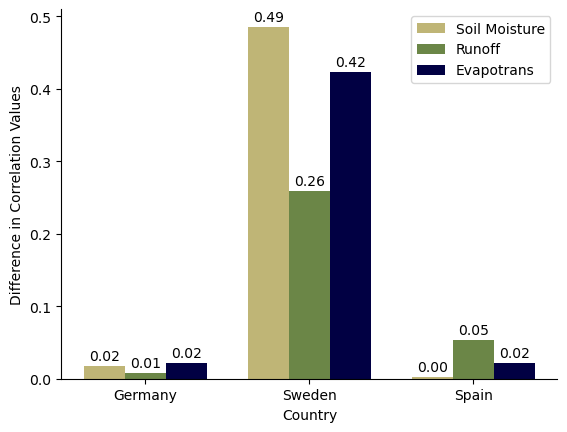

In [19]:
bar_width = 0.25
index = np.arange(len(countries))

fig, ax = plt.subplots()
for i in range(len(corr_types)):
    colors = ['#BFB576', '#6B8647', '#010043']  # Colors for Germany, Sweden, and Spain respectively
    bars = ax.bar([x + i * bar_width for x in index], [row[i] for row in diff_data], bar_width, label=corr_types[i], color=colors[i])
    for j, bar in enumerate(bars):
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_xlabel('Country')
ax.set_ylabel('Difference in Correlation Values')
#ax.set_title('Differences in Correlation Values by Country')
ax.set_xticks([x + (2*bar_width) / 2 for x in index])
ax.set_xticklabels(countries)
ax.legend(labels=['Soil Moisture', 'Runoff', 'Evapotrans'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('../figs/corr_diff_bar.png', dpi=300, bbox_inches='tight')

plt.show()